In [3]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import f1_score
from src.helper import get_split_data

In [21]:
X_trn, y_trn, X_val, y_val, X_tst, y_tst = get_split_data.split_data_for_training(6)

In [25]:
params = {'colsample_bytree': 0.7887208630174802,
          'gamma': 0.005161005354259574,
          'learning_rate': 0.17211094449320538,
          'max_depth': 12,
          'n_estimators': 650,
          'reg_alpha': 1.6990009848301428,
          'reg_lambda': 0.019828502573641174,
          'subsample': 0.8120968650925882}

xg = xgb.XGBClassifier(random_state=42)
xg.fit(X_trn, y_trn, eval_set=[(X_trn, y_trn), (X_val, y_val)], verbose=False)
y_pred = xg.predict(X_tst)

f1_score(y_tst, y_pred, average='binary').round(3)

np.float64(0.0)

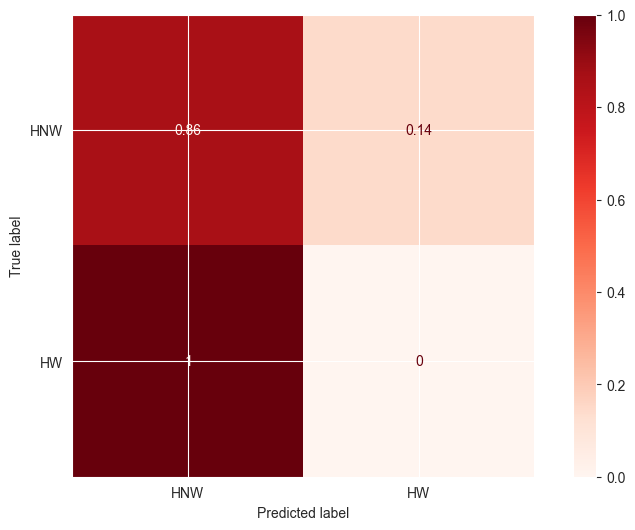

In [26]:
from sklearn import metrics
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
cm = metrics.confusion_matrix(y_tst, xg.predict(X_tst), normalize='true')
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['HNW', 'HW'])
disp.plot(ax=ax, cmap='Reds')

In [27]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_tst, xg.predict(X_tst))
cm

array([[6, 1],
       [3, 0]])